In [1]:
import pandas as pd

encodings = ['utf-8', 'latin1', 'ISO-8859-1']

for encoding in encodings:
    try:
        collatz_df = pd.read_csv('collatz_C(x)_10_5.csv', encoding=encoding, index_col = 0)
        print(f"CSV file read successfully with encoding: {encoding}")
        break  # Break out of the loop if successful
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")

for encoding in encodings:
    try:
        collatz_t_df = pd.read_csv('collatz_T(x)_10_5.csv', encoding=encoding, index_col = 0)
        print(f"CSV file read successfully with encoding: {encoding}")
        break  # Break out of the loop if successful
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")

Failed to read with encoding: utf-8
CSV file read successfully with encoding: latin1
Failed to read with encoding: utf-8
CSV file read successfully with encoding: latin1


In [2]:
import ast

collatz_df['secuencia'] = collatz_df['secuencia'].apply(ast.literal_eval) # para que las secuancias las interprete como números y no como strings

In [3]:
collatz_t_df['secuencia'] = collatz_t_df['secuencia'].apply(ast.literal_eval)

In [4]:
collatz_df

,t_parada,t_parada_total,pico_max,s,proporcion_pares,secuencia
Número,,,,,,
1,0,0,1.0,1.000000,0.000,[1]
2,1,1,2.0,1.000000,0.500,"[2, 1]"
3,6,7,16.0,5.333333,0.625,"[3, 10, 5, 16, 8, 4, 2, 1]"
4,1,2,4.0,1.000000,0.667,"[4, 2, 1]"
5,3,5,16.0,3.200000,0.667,"[5, 16, 8, 4, 2, 1]"
...,...,...,...,...,...,...
99996,1,89,189800.0,1.898516,0.678,"[99996, 49998, 24999, 74998, 37499, 112498, 56..."
99997,3,89,300000.0,3.000010,0.678,"[99997, 299992, 149996, 74998, 37499, 112498, ..."
99998,1,89,506200.0,5.062581,0.678,"[99998, 49999, 149998, 74999, 224998, 112499, ..."


In [5]:
collatz_t_df

,t_parada,t_parada_total,pico_max,s,proporcion_pares,secuencia
Número,,,,,,
1,0,0,1.0,1.000000,0.000,[1]
2,1,1,2.0,1.000000,0.500,"[2, 1]"
3,4,5,8.0,2.666667,0.500,"[3, 5, 8, 4, 2, 1]"
4,1,2,4.0,1.000000,0.667,"[4, 2, 1]"
5,2,4,8.0,1.600000,0.600,"[5, 8, 4, 2, 1]"
...,...,...,...,...,...,...
99996,1,61,100000.0,1.000000,0.532,"[99996, 49998, 24999, 37499, 56249, 84374, 421..."
99997,2,61,150000.0,1.500005,0.532,"[99997, 149996, 74998, 37499, 56249, 84374, 42..."
99998,1,61,253100.0,2.531291,0.532,"[99998, 49999, 74999, 112499, 168749, 253124, ..."


In [6]:
type(1.0)

float

In [7]:
import math

def formatear_latex(numero):
    exponente = 0
    if numero <= 1000 and numero >= 1:
        return int(numero)
    elif numero < 1:
        return round(numero, 4)
    else:
        while numero >= 10:
            numero /= 10
            exponente += 1
            if numero == 1.0:
                return f'10^{{{exponente}}}'
        return f"{numero:.2f} \cdot 10^{{{exponente}}}"
    

    
def formatear_numero(x):
    if math.floor(x) == math.ceil(x) :
        return int(x)  # Muestra el número como entero sin decimales
    else:
        return '{:,.2f}'.format(x)  # Muestra el número con dos decimales

In [8]:
print(int(math.pi * pow(10, 200)))

314159265358979289194522341965928279072903105113123145558291671244878688660306671313462261981884520413951031019049346963663142903849542557861321443601272455755828083112185565885356499680846072407654400


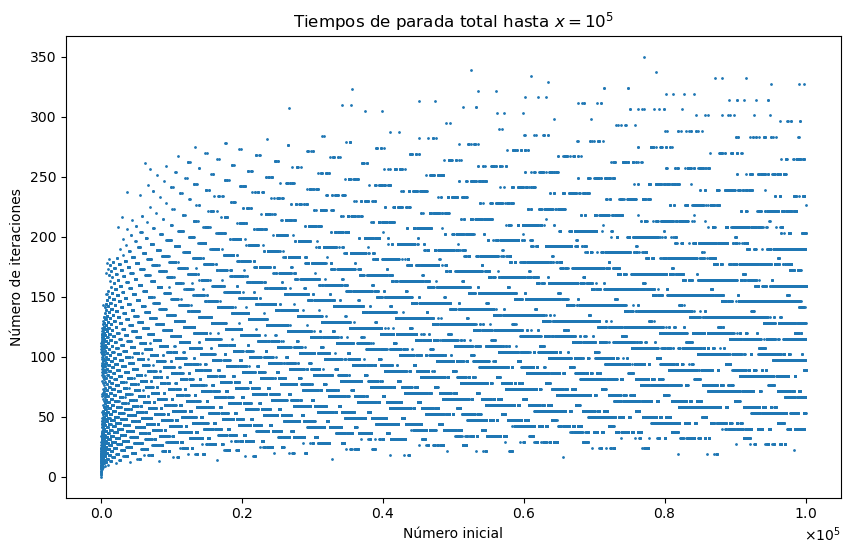

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(10, 6))

collatz_df['t_parada_total'].plot(marker = 'o', linestyle = '', markersize = 1)
plt.ylabel('Número de iteraciones')
plt.xlabel('Número inicial')
plt.title(fr'Tiempos de parada total hasta $x={formatear_latex(len(collatz_df))}$')

# Utilizar ScalarFormatter para notación científica en el eje x
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))  # Establecer límites de potencia para mostrar notación científica
plt.gca().xaxis.set_major_formatter(formatter)


# Cambia el nombre del archivo a algo simple
plt.savefig('Figures/tiempos_parada_totales.pdf', bbox_inches='tight')
#plt.xlim(1, 500)
#plt.ylim(0, 150)

t_parada_total
71     1467
63     1424
76     1417
58     1337
68     1250
89     1234
81     1181
55     1158
50     1148
146    1148
Name: count, dtype: int64
Número de tiempos de parada distintos: 315


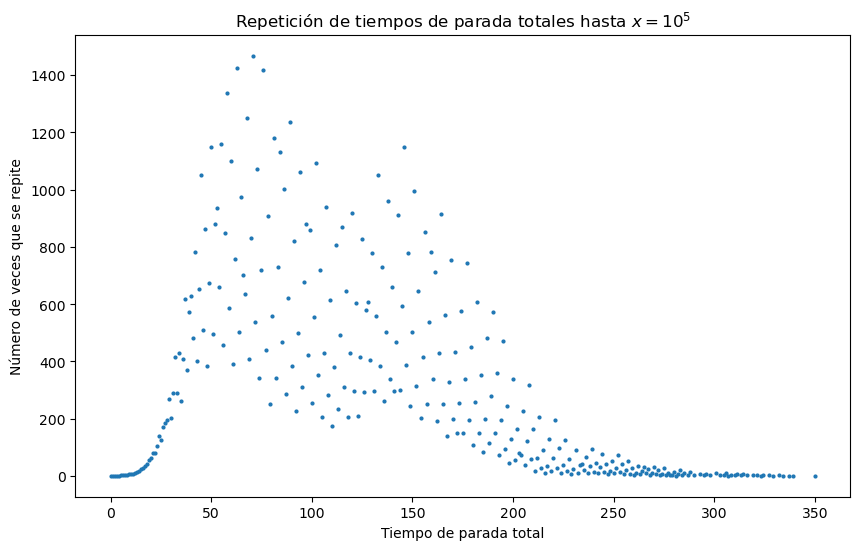

In [10]:
conteo_t_parada_total = collatz_df['t_parada_total'].value_counts()
print(conteo_t_parada_total.head(10))
print(f'Número de tiempos de parada distintos: {len(conteo_t_parada_total)}')
      
plt.figure(figsize=(10, 6))
conteo_t_parada_total.plot(marker = 'o', markersize = 2, linestyle = '')
plt.xlabel('Tiempo de parada total')
plt.ylabel('Número de veces que se repite')
plt.title(fr'Repetición de tiempos de parada totales hasta $x = {formatear_latex(collatz_df.index.max())}$')
plt.savefig('Figures/repeticion_tiempos_parada_totales.pdf', bbox_inches='tight')


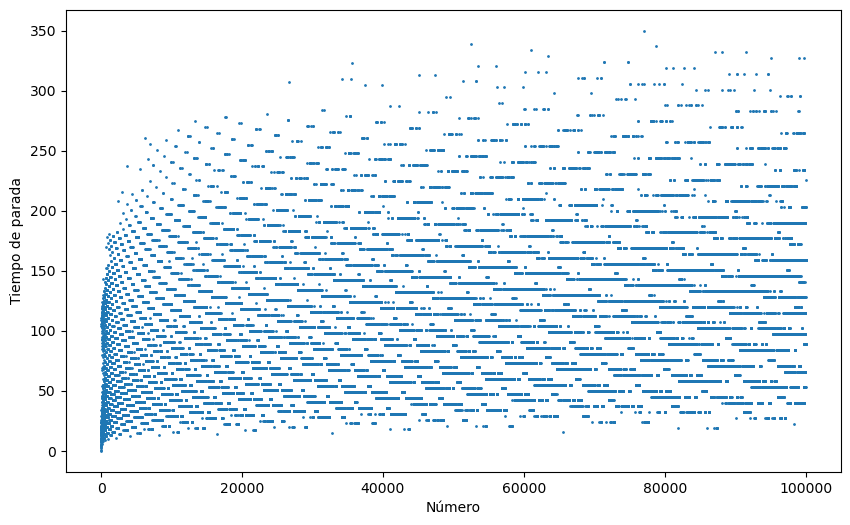

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

collatz_df['t_parada_total'].plot(marker = 'o', linestyle = '', markersize = 1)
plt.ylabel('Tiempo de parada')
#plt.xlim(1, 1000)
#plt.ylim(0, 20)
plt.show()

Text(0.5, 1.0, 'Distribución de los tiempos de parada totales hasta $x = 1000$')

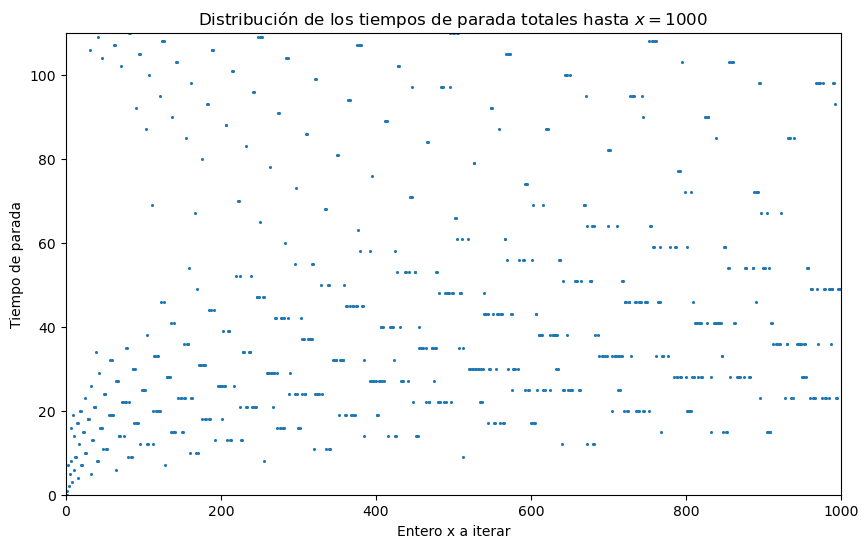

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(collatz_df.index, collatz_df['t_parada_total'], s = 1.5)
plt.ylabel('Tiempo de parada')
plt.xlabel('Entero x a iterar')
xlim = 1000
plt.xlim(0,xlim)
plt.ylim(0, 110)
plt.title(fr'Distribución de los tiempos de parada totales hasta $x = {xlim}$')

Text(0.5, 1.0, 'Distribución de los tiempos de parada totales hasta $x = 500$')

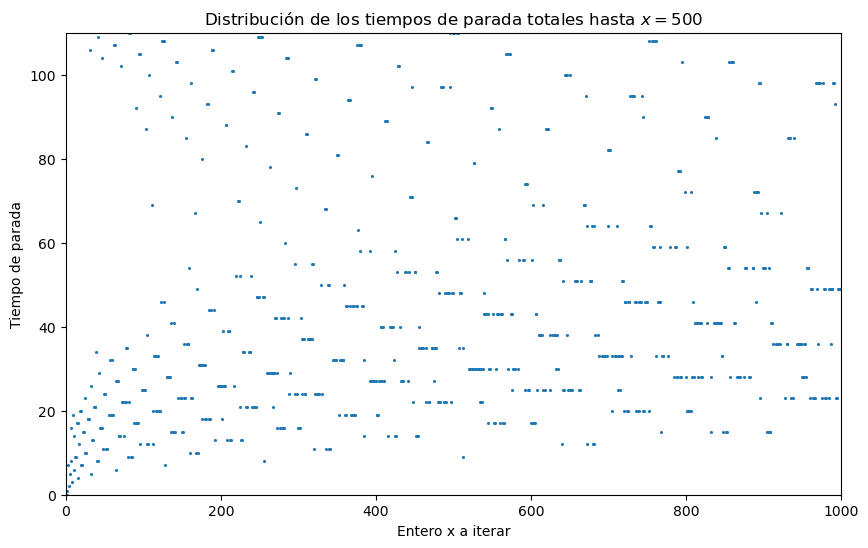

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(collatz_t_df.index, collatz_df['t_parada_total'], s = 1.5)
plt.ylabel('Tiempo de parada')
plt.xlabel('Entero x a iterar')
xlim = 500
plt.xlim(0,1000)
plt.ylim(0, 110)
plt.title(fr'Distribución de los tiempos de parada totales hasta $x = {xlim}$')

In [14]:
collatz_df.head(10)

,t_parada,t_parada_total,pico_max,s,proporcion_pares,secuencia
Número,,,,,,
1,0,0,1.0,1.000000,0.000,[1]
2,1,1,2.0,1.000000,0.500,"[2, 1]"
3,6,7,16.0,5.333333,0.625,"[3, 10, 5, 16, 8, 4, 2, 1]"
4,1,2,4.0,1.000000,0.667,"[4, 2, 1]"
5,3,5,16.0,3.200000,0.667,"[5, 16, 8, 4, 2, 1]"
6,1,8,16.0,2.666667,0.667,"[6, 3, 10, 5, 16, 8, 4, 2, 1]"
7,11,16,52.0,7.428571,0.647,"[7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5,..."
8,1,3,8.0,1.000000,0.750,"[8, 4, 2, 1]"
9,3,19,52.0,5.777778,0.650,"[9, 28, 14, 7, 22, 11, 34, 17, 52, 26, 13, 40,..."


Text(0.5, 1.0, 'Trayectoria 3x + 1 del número 27 bajo la iteración de $C(x)$')

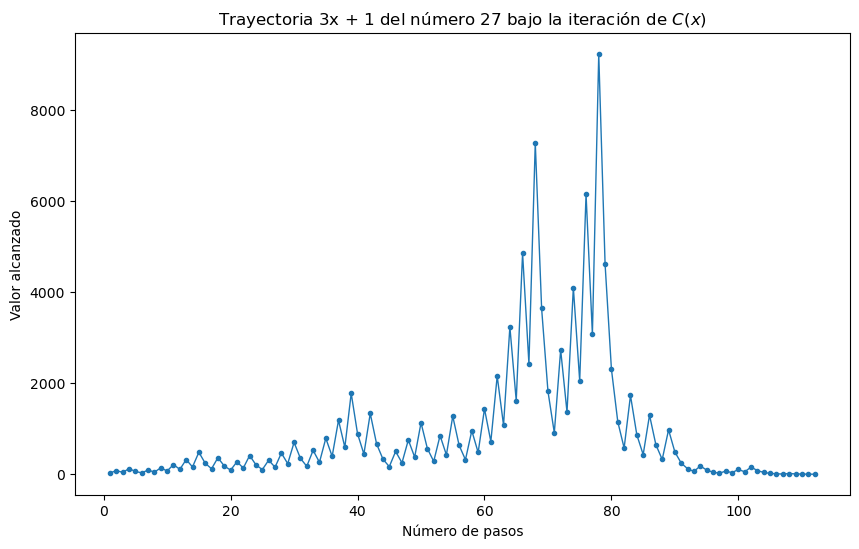

In [15]:
import numpy as np

plt.figure(figsize=(10, 6))
secuncia_27 =  collatz_df.at[27, 'secuencia']
plt.plot(np.arange(1, len(secuncia_27)+1), secuncia_27, marker = 'o', markersize = 3, linewidth = 1)
plt.xlabel('Número de pasos')
plt.ylabel('Valor alcanzado')
plt.title(r'Trayectoria 3x + 1 del número 27 bajo la iteración de $C(x)$')

Text(0.5, 1.0, 'Trayectoria 3x + 1 del número 27 bajo la iteración de $T(x)$')

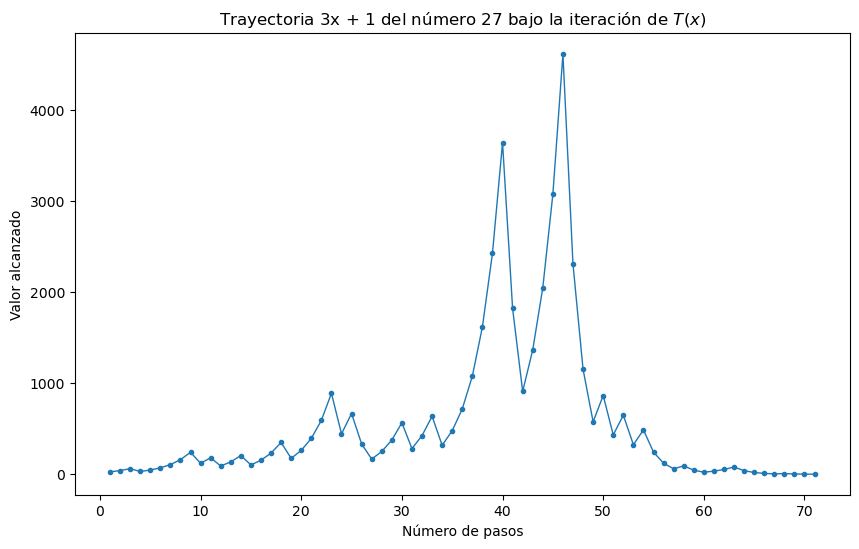

In [16]:
import numpy as np

plt.figure(figsize=(10, 6))
secuncia_27 =  collatz_t_df.at[27, 'secuencia']
plt.plot(np.arange(1, len(secuncia_27)+1), secuncia_27, marker = 'o', markersize = 3, linewidth = 1)
plt.xlabel('Número de pasos')
plt.ylabel('Valor alcanzado')
plt.title(r'Trayectoria 3x + 1 del número 27 bajo la iteración de $T(x)$')

Text(0.5, 1.0, 'Trayectoria 3x + 1 del número 27 bajo iteración')

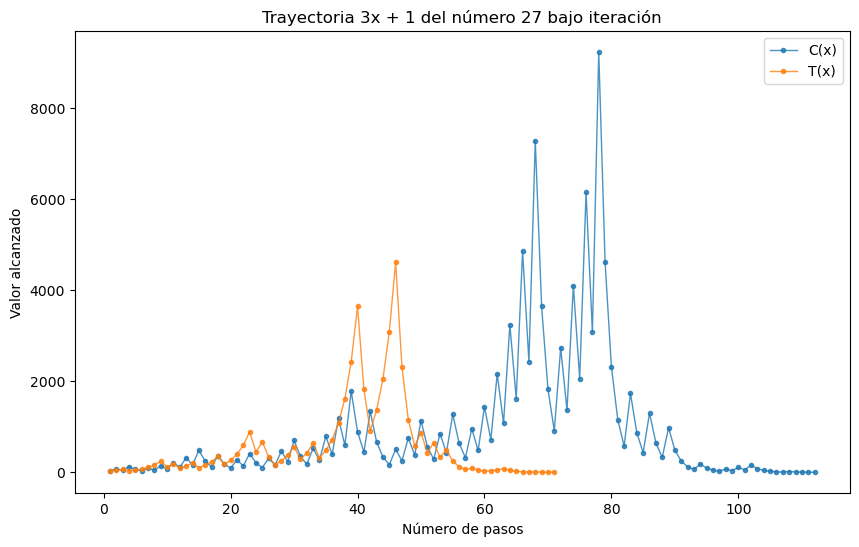

In [17]:
plt.figure(figsize=(10, 6))
secuncia_27_t =  collatz_t_df.at[27, 'secuencia']
secuncia_27_c =  collatz_df.at[27, 'secuencia']
plt.plot(np.arange(1, len(secuncia_27_c)+1), secuncia_27_c, marker = 'o', markersize = 3, linewidth = 1, alpha = 0.8, label = r'C(x)')
plt.plot(np.arange(1, len(secuncia_27_t)+1), secuncia_27_t, marker = 'o', markersize = 3, linewidth = 1, alpha = 0.8, label = r'T(x)')
plt.xlabel('Número de pasos')
plt.ylabel('Valor alcanzado')
plt.legend()
plt.title(r'Trayectoria 3x + 1 del número 27 bajo iteración')

Text(0.5, 1.0, 'Trayectoria 3x + 1 del número 26 ')

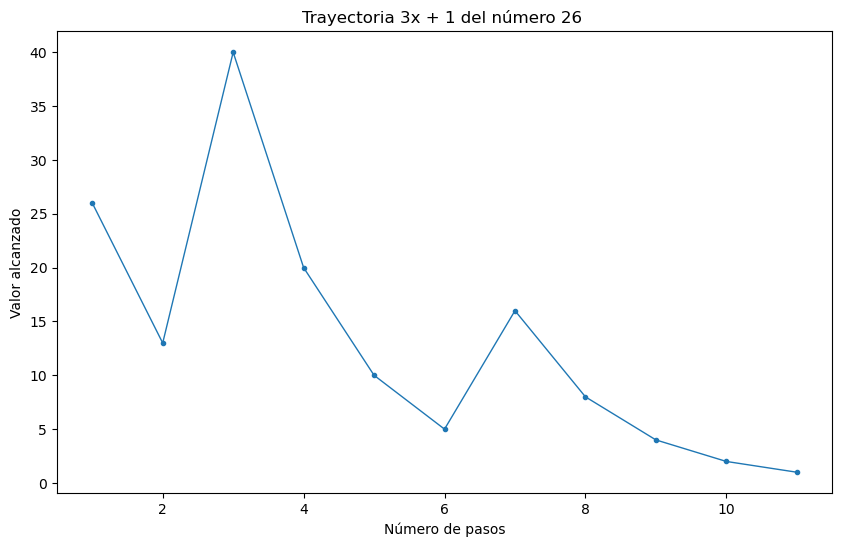

In [18]:
import numpy as np

plt.figure(figsize=(10, 6))
secuncia_26 =  collatz_df.at[26, 'secuencia']
plt.plot(np.arange(1, len(secuncia_26)+1), secuncia_26, marker = 'o', markersize = 3, linewidth = 1)
plt.xlabel('Número de pasos')
plt.ylabel('Valor alcanzado')
plt.title('Trayectoria 3x + 1 del número 26 ')

Text(0.5, 1.0, 'Trayectoria 3x + 1 del número 26 ')

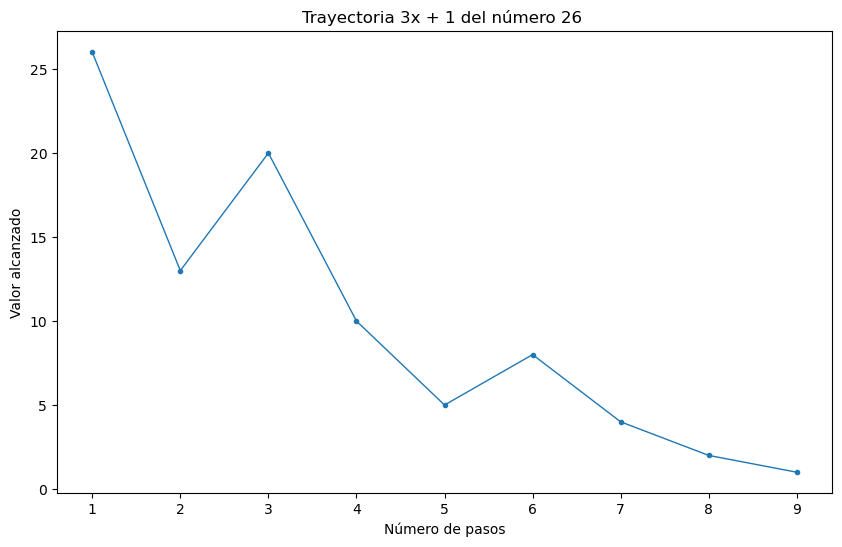

In [19]:
import numpy as np

plt.figure(figsize=(10, 6))
secuncia_26 =  collatz_t_df.at[26, 'secuencia']
plt.plot(np.arange(1, len(secuncia_26)+1), secuncia_26, marker = 'o', markersize = 3, linewidth = 1)
plt.xlabel('Número de pasos')
plt.ylabel('Valor alcanzado')
plt.title('Trayectoria 3x + 1 del número 26 ')

Text(0.5, 1.0, 'Trayectoria 3x + 1 del número 649')

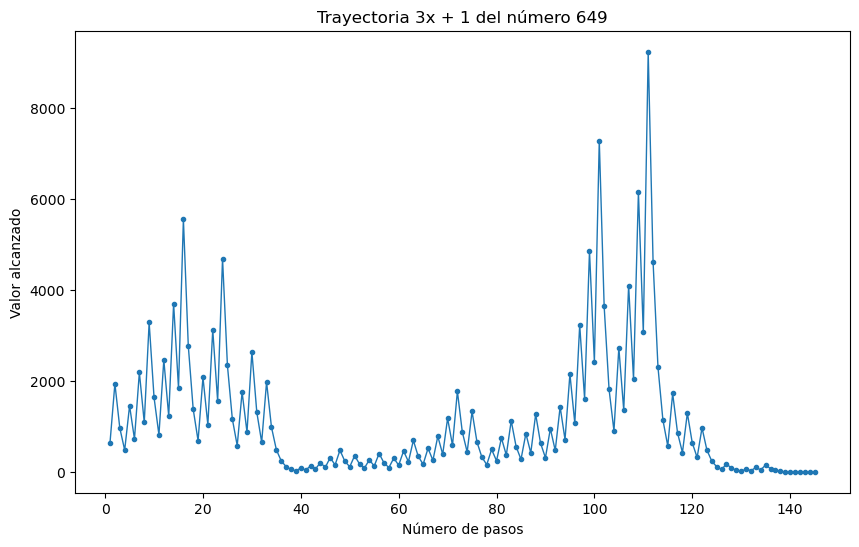

In [20]:
plt.figure(figsize=(10, 6))
secuncia_649 =  collatz_df.at[649, 'secuencia']
plt.plot(np.arange(1, len(secuncia_649)+1), secuncia_649, marker = 'o', markersize = 3, linewidth = 1)
plt.xlabel('Número de pasos')
plt.ylabel('Valor alcanzado')
plt.title('Trayectoria 3x + 1 del número 649')

Text(0.5, 1.0, 'Trayectoria 3x + 1 del número 649')

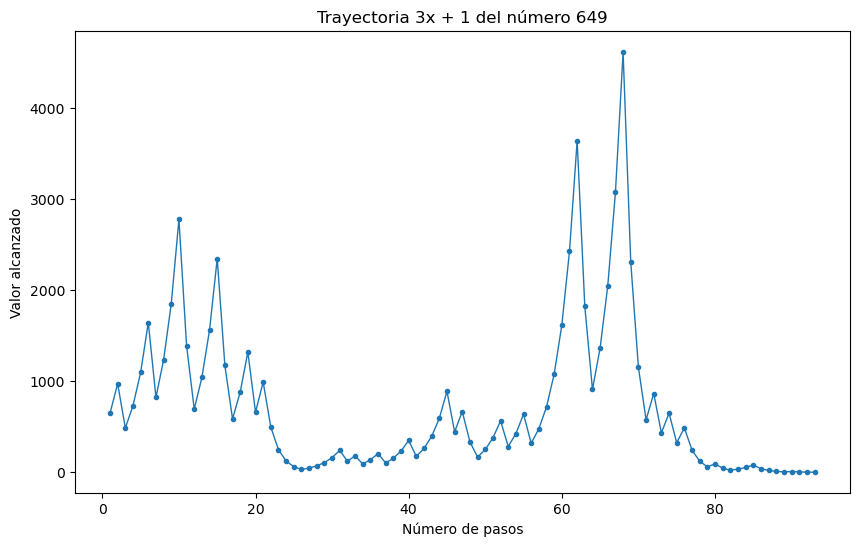

In [21]:
plt.figure(figsize=(10, 6))
secuncia_649 =  collatz_t_df.at[649, 'secuencia']
plt.plot(np.arange(1, len(secuncia_649)+1), secuncia_649, marker = 'o', markersize = 3, linewidth = 1)
plt.xlabel('Número de pasos')
plt.ylabel('Valor alcanzado')
plt.title('Trayectoria 3x + 1 del número 649')

Text(0.5, 1.0, 'Trayectoria 3x + 1 del número 650')

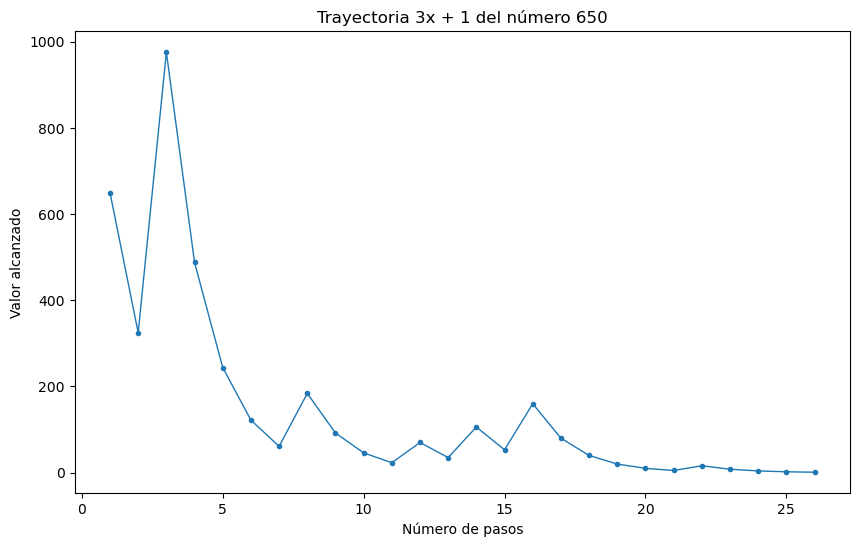

In [22]:
plt.figure(figsize=(10, 6))
secuncia_650 =  collatz_df.at[650, 'secuencia']
plt.plot(np.arange(1, len(secuncia_650)+1), secuncia_650, marker = 'o', markersize = 3, linewidth = 1)
plt.xlabel('Número de pasos')
plt.ylabel('Valor alcanzado')
plt.title('Trayectoria 3x + 1 del número 650')

Text(0.5, 1.0, 'Trayectoria 3x + 1 del número 650')

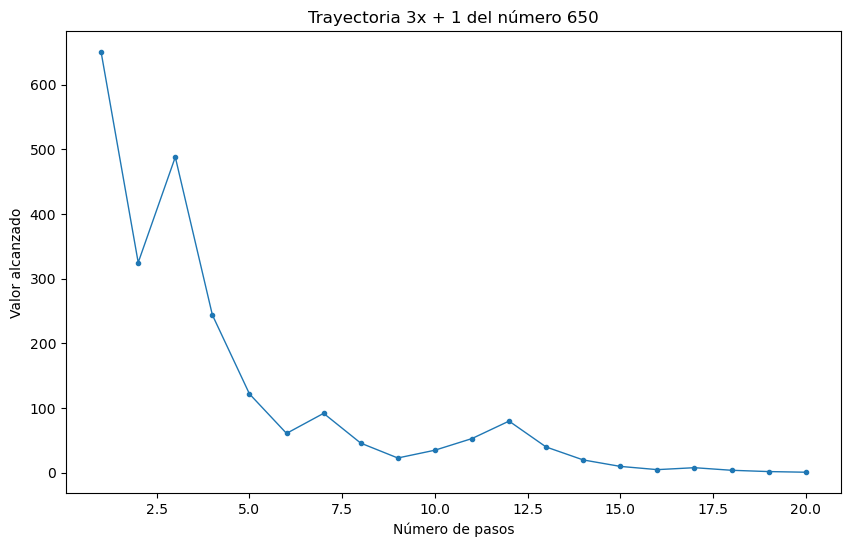

In [23]:
plt.figure(figsize=(10, 6))
secuncia_650 =  collatz_t_df.at[650, 'secuencia']
plt.plot(np.arange(1, len(secuncia_650)+1), secuncia_650, marker = 'o', markersize = 3, linewidth = 1)
plt.xlabel('Número de pasos')
plt.ylabel('Valor alcanzado')
plt.title('Trayectoria 3x + 1 del número 650')

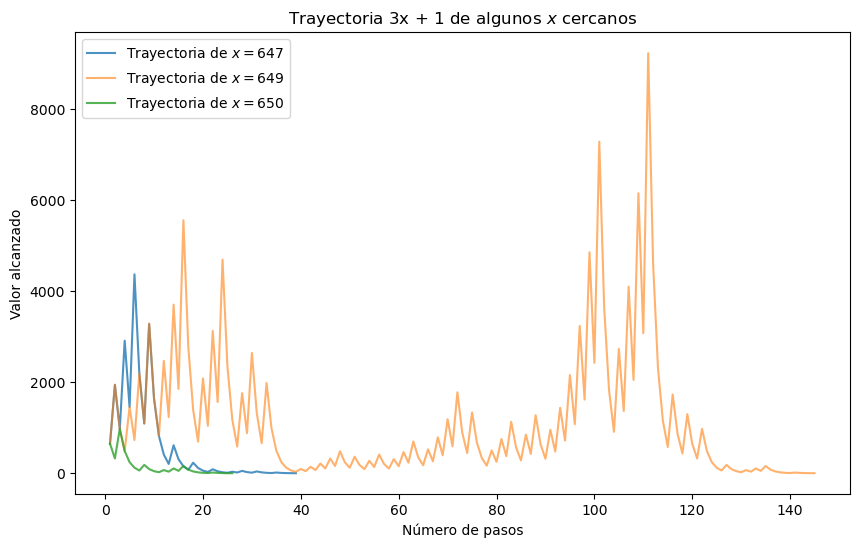

In [24]:
plt.figure(figsize=(10, 6))
secuncia_649 =  collatz_df.at[649, 'secuencia']
secuncia_650 =  collatz_df.at[650, 'secuencia']
secuncia_647 =  collatz_df.at[647, 'secuencia']

plt.plot(np.arange(1, len(secuncia_647)+1), secuncia_647, marker = '', markersize = 2, label = r'Trayectoria de $x = 647$', alpha = 0.8)
plt.plot(np.arange(1, len(secuncia_649)+1), secuncia_649, marker = '', markersize = 3, label = r'Trayectoria de $x = 649$', alpha = 0.6)
plt.plot(np.arange(1, len(secuncia_650)+1), secuncia_650, marker = '', markersize = 2, label = r'Trayectoria de $x = 650$', alpha = 0.8)

plt.legend()
plt.xlabel('Número de pasos')
plt.ylabel('Valor alcanzado')
plt.title(r'Trayectoria 3x + 1 de algunos $x$ cercanos' )
plt.savefig('Figures/trayectoria_cercanos.pdf', bbox_inches='tight')

In [25]:
collatz_df

,t_parada,t_parada_total,pico_max,s,proporcion_pares,secuencia
Número,,,,,,
1,0,0,1.0,1.000000,0.000,[1]
2,1,1,2.0,1.000000,0.500,"[2, 1]"
3,6,7,16.0,5.333333,0.625,"[3, 10, 5, 16, 8, 4, 2, 1]"
4,1,2,4.0,1.000000,0.667,"[4, 2, 1]"
5,3,5,16.0,3.200000,0.667,"[5, 16, 8, 4, 2, 1]"
...,...,...,...,...,...,...
99996,1,89,189800.0,1.898516,0.678,"[99996, 49998, 24999, 74998, 37499, 112498, 56..."
99997,3,89,300000.0,3.000010,0.678,"[99997, 299992, 149996, 74998, 37499, 112498, ..."
99998,1,89,506200.0,5.062581,0.678,"[99998, 49999, 149998, 74999, 224998, 112499, ..."


t_parada_total
50    1853
45    1790
42    1760
53    1733
48    1555
61    1532
37    1512
58    1493
40    1489
96    1437
Name: count, dtype: int64
Número de tiempos de parada distintos: 210


Text(0.5, 1.0, 'Repetición de tiempos de para hasta $x = 100000$')

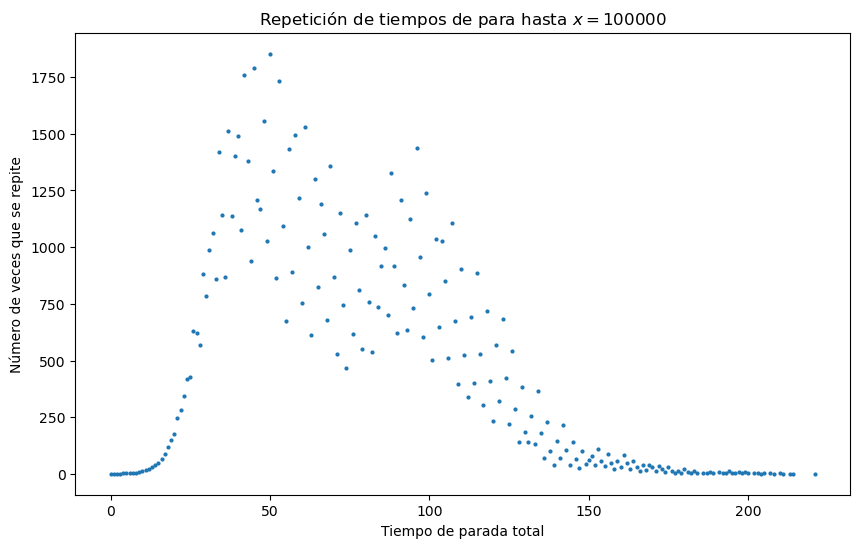

In [26]:
conteo_t_parada_total = collatz_t_df['t_parada_total'].value_counts()
print(conteo_t_parada_total.head(10))
print(f'Número de tiempos de parada distintos: {len(conteo_t_parada_total)}')
      
plt.figure(figsize=(10, 6))
conteo_t_parada_total.plot(marker = 'o', markersize = 2, linestyle = '')
plt.xlabel('Tiempo de parada total')
plt.ylabel('Número de veces que se repite')
plt.title(fr'Repetición de tiempos de para hasta $x = {collatz_df.index.max()}$')

Text(0.5, 1.0, 'Máximo de la secuencia $3x + 1$ de cada número hasta el $10^{5}$')

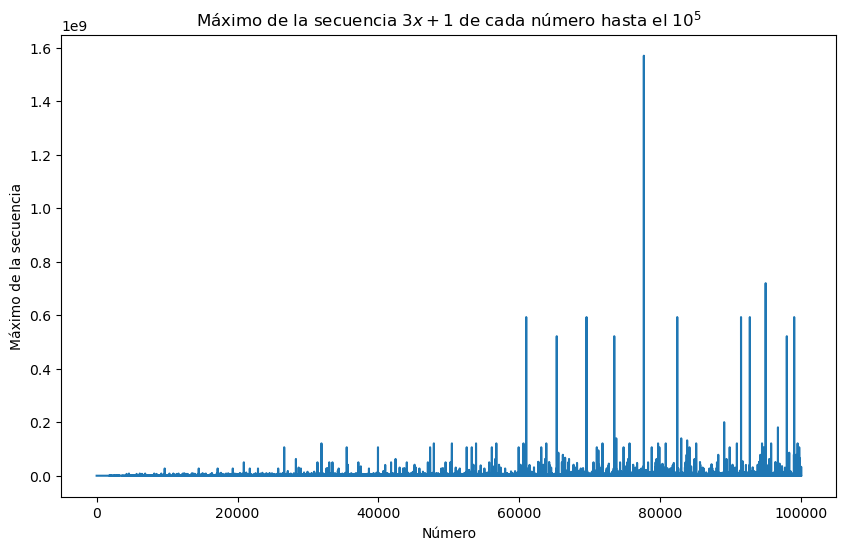

In [27]:
plt.figure(figsize=(10, 6))
collatz_df['pico_max'].plot()
plt.ylabel('Máximo de la secuencia')
plt.title(fr'Máximo de la secuencia $3x + 1$ de cada número hasta el ${formatear_latex(collatz_df.index.max())}$')

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(collatz_df.index, collatz_df['pico_max'], color='blue')
plt.ylabel('Máximo de la secuencia')
plt.title(fr'Máximo de la secuencia $3x + 1$ de cada número hasta el ${formatear_latex(collatz_df.index.max())}$')

KeyboardInterrupt: 

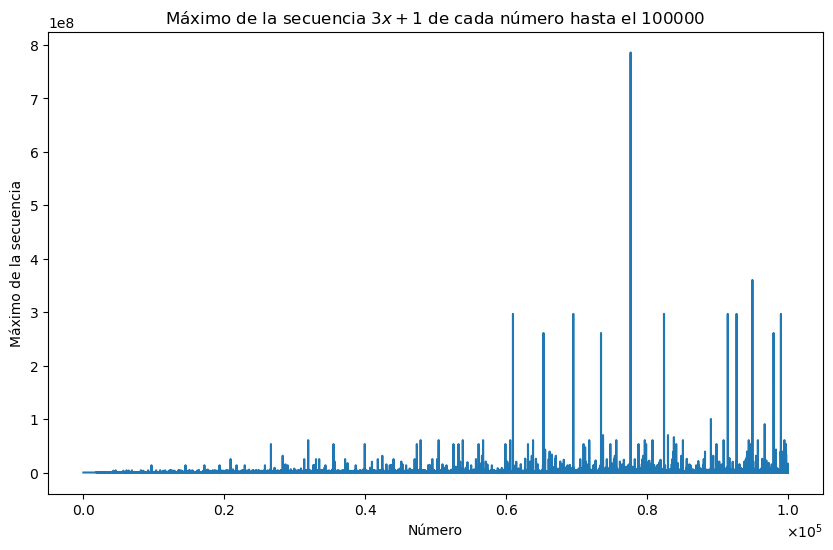

In [ ]:
plt.figure(figsize=(10, 6))
collatz_t_df['pico_max'].plot()
plt.ylabel('Máximo de la secuencia')
plt.title(fr'Máximo de la secuencia $3x + 1$ de cada número hasta el {collatz_df.index.max()}')

# Utilizar ScalarFormatter para notación científica en el eje x
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))  # Establecer límites de potencia para mostrar notación científica
plt.gca().xaxis.set_major_formatter(formatter)


# Cambia el nombre del archivo a algo simple
plt.savefig('Figures/máximos_trayectoria.pdf', bbox_inches='tight')

In [ ]:
encodings = ['utf-8', 'latin1', 'ISO-8859-1']

for encoding in encodings:
    try:
        collatz2_df = pd.read_csv('collatz2.csv', encoding=encoding, index_col = 0)
        print(f"CSV file read successfully with encoding: {encoding}")
        break  # Break out of the loop if successful
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")

Failed to read with encoding: utf-8
CSV file read successfully with encoding: latin1


In [ ]:
collatz2_df

,t_parada,t_parada_total,pico_max
Número,,,
3.141593e+12,1,264,7.952156e+12
3.141593e+12,1,308,7.068583e+12
3.141593e+12,1,269,3.141593e+12
3.141593e+12,1,308,4.712389e+12
3.141593e+12,1,308,3.184454e+12
...,...,...,...
3.141593e+12,8,264,2.120575e+13
3.141593e+12,3,269,9.424778e+12
3.141593e+12,8,264,2.866009e+13


In [ ]:
fila = []
matriz = []
j = -1
k = 0
while k <= 9:
    for valor in collatz2_df['t_parada_total']:
        j = j + 1
        fila.append(valor)


        if j == 9:
            k = k + 1
            j = -1
            matriz.append(fila)
            fila = []
matriz = np.array(matriz)

In [ ]:
print(matriz)

[[264 308 269 308 308 308 357 264 308 308]
 [264 264 308 308 308 308 308 264 308 308]
 [264 308 308 308 308 357 357 269 269 308]
 [264 308 308 308 308 269 445 269 269 264]
 [269 308 269 445 269 308 308 269 308 308]
 [264 308 269 445 308 308 308 264 308 264]
 [264 308 308 269 269 357 308 308 308 308]
 [264 308 308 308 308 357 445 321 308 308]
 [308 308 308 269 308 264 269 308 308 308]
 [308 308 308 269 308 264 269 264 308 308]]


In [ ]:
conteo_t_parada_total = collatz2_df['t_parada_total'].value_counts()
print(conteo_t_parada_total.head(10))
print(f'Número de tiempos de parada distintos: {len(conteo_t_parada_total)}')

t_parada_total
308    57
269    17
264    16
357     5
445     4
321     1
Name: count, dtype: int64
Número de tiempos de parada distintos: 6


In [ ]:
tabla = pd.read_csv('collatz_C(x)_tabla.csv', encoding='latin1')
tabla

,Número,t_parada,t_parada_total,pico_max,s,proporcion_pares
0,1.000000e+00,0,0,1.000000e+00,1.000000e+00,0.000
1,7.000000e+00,11,16,5.200000e+01,7.428571e+00,0.647
2,2.700000e+01,96,111,9.232000e+03,3.419259e+02,0.625
3,3.100000e+01,91,106,9.232000e+03,2.978065e+02,0.626
4,3.200000e+01,1,5,3.200000e+01,1.000000e+00,0.833
5,3.300000e+01,3,26,1.000000e+02,3.030303e+00,0.667
6,1.126000e+15,233,593,1.436000e+24,1.275243e+09,0.645
7,1.126000e+15,3,332,3.378000e+15,3.000000e+00,0.670
8,3.273000e+150,2981,6748,7.272000e+238,2.221568e+88,0.642
9,3.273000e+150,3,3279,9.820000e+150,3.000000e+00,0.672


In [ ]:
import pandas as pd

tabla = pd.read_csv('collatz_C(x)_tabla.csv', encoding='latin1')

tabla = tabla.applymap(formatear_latex)
'''
tabla['Número'] = tabla['Número'].apply(formatear_entero_grande)
tabla['pico_max'] = tabla['pico_max'].apply(formatear_entero_grande)
tabla['s'] = tabla['s'].apply(formatear_entero_grande)
tabla = tabla.applymap(lambda x: formatear_numero(x) if pd.api.types.is_numeric_dtype(x) else x)
'''
tabla = tabla.applymap(lambda x: '${}$'.format(x) if not pd.api.types.is_numeric_dtype(x) else x)


print(tabla.to_latex(header = True, index = False, escape = False, column_format='cccccc'))

\begin{tabular}{cccccc}
\toprule
Número & t_parada & t_parada_total & pico_max & s & proporcion_pares \\
\midrule
$1$ & $0$ & $0$ & $1$ & $1$ & $0.0$ \\
$7$ & $11$ & $16$ & $52$ & $7$ & $0.647$ \\
$27$ & $96$ & $111$ & $9.23 \cdot 10^{3}$ & $341$ & $0.625$ \\
$31$ & $91$ & $106$ & $9.23 \cdot 10^{3}$ & $297$ & $0.626$ \\
$32$ & $1$ & $5$ & $32$ & $1$ & $0.833$ \\
$33$ & $3$ & $26$ & $100$ & $3$ & $0.667$ \\
$1.13 \cdot 10^{15}$ & $233$ & $593$ & $1.44 \cdot 10^{24}$ & $1.28 \cdot 10^{9}$ & $0.645$ \\
$1.13 \cdot 10^{15}$ & $3$ & $332$ & $3.38 \cdot 10^{15}$ & $3$ & $0.67$ \\
$3.27 \cdot 10^{150}$ & $2.98 \cdot 10^{3}$ & $6.75 \cdot 10^{3}$ & $7.27 \cdot 10^{238}$ & $2.22 \cdot 10^{88}$ & $0.642$ \\
$3.27 \cdot 10^{150}$ & $3$ & $3.28 \cdot 10^{3}$ & $9.82 \cdot 10^{150}$ & $3$ & $0.672$ \\
\bottomrule
\end{tabular}



In [ ]:
for encoding in encodings:
    try:
        collatz_ejemplo_modelo_df = pd.read_csv('collatz_T(x)_ejemplo_modelo_sencillo.csv', encoding=encoding)
        print(f"CSV file read successfully with encoding: {encoding}")
        break  # Break out of the loop if successful
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")

collatz_ejemplo_modelo_df['secuencia'] = collatz_ejemplo_modelo_df['secuencia'].apply(ast.literal_eval) # para que las secuancias las interprete como números y no como strings

CSV file read successfully with encoding: utf-8


In [ ]:
collatz_ejemplo_modelo_df

,numero,secuencia
0,3141592653589,"[3141592653589, 4712388980384, 2356194490192, ..."
1,77031,"[77031, 115547, 173321, 259982, 129991, 194987..."


In [ ]:
m = -0.14384
secuencia1 = np.log(collatz_ejemplo_modelo_df.loc[0, 'secuencia'])
secuencia2 = np.log(collatz_ejemplo_modelo_df.loc[1, 'secuencia'])
numero1 = collatz_ejemplo_modelo_df.loc[0, 'numero']
numero2 = collatz_ejemplo_modelo_df.loc[1, 'numero']
recta1 = m * np.arange(0, len(secuencia1)) + math.log(numero1)
recta2 = m * np.arange(0, len(secuencia2)) + math.log(numero2)

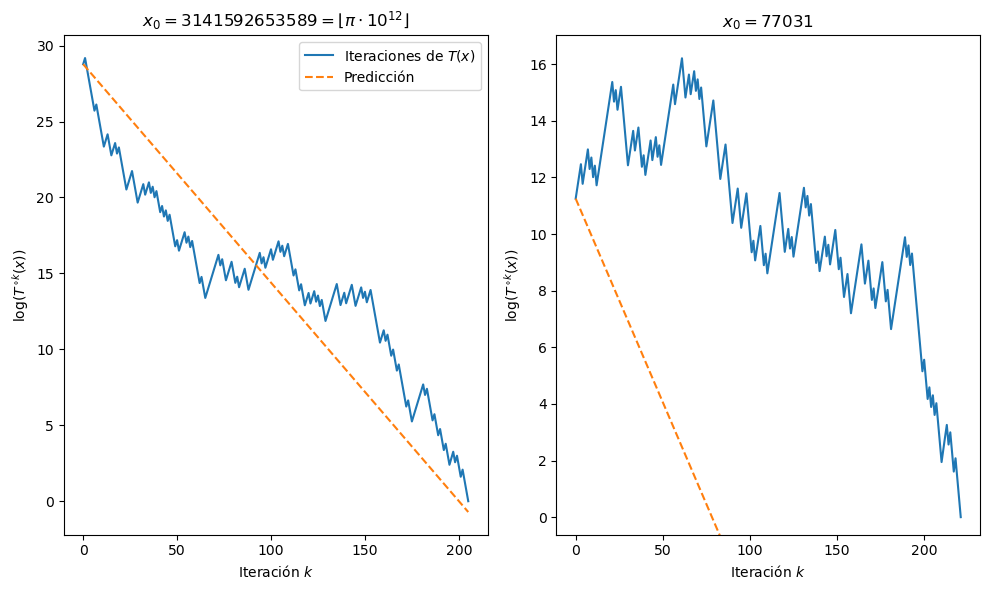

Número de pasos predicho para x = 3141592653589: 206
Número de pasos calculado para x = 3141592653589: 200.05388627487275
Número de pasos predicho para x = 77031: 222
Número de pasos calculado para x = 77031: 78.22555073149215


In [ ]:
plt.figure(figsize=(10, 6))

# Crear subgráficas
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primera subgráfica
plt.plot(np.arange(0, len(secuencia1)), secuencia1, label = 'Iteraciones de $T(x)$')
plt.plot(np.arange(0, len(secuencia1)), recta1, linestyle = '--', label = 'Predicción')
plt.title(fr'$x_0 = {numero1} = \lfloor \pi \cdot 10^{{12}} \rfloor$')
plt.xlabel(r'Iteración $k$')
plt.ylabel(r'$\log(T^{\circ k}(x))$')
plt.legend()

plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segunda subgráfica
plt.plot(np.arange(0, len(secuencia2)), secuencia2)
plt.plot(np.arange(0, len(secuencia2)), recta2, linestyle = '--')
plt.ylim(1 - np.max(secuencia2) * 0.10, np.max(secuencia2) * (1.05) )
plt.title(fr'$x_0 = {numero2}$')
plt.xlabel(r'Iteración $k$')
plt.ylabel(r'$\log(T^{\circ k}(x))$')



# Ajustar diseño y mostrar gráficas
plt.tight_layout()
plt.savefig('Figures/predicciones_modelo.pdf', bbox_inches = 'tight')
plt.show()

print(f'Número de pasos predicho para x = {numero1}: {len(secuencia1)}')
print(f'Número de pasos calculado para x = {numero1}: {-math.log(numero1)/m}')
print(f'Número de pasos predicho para x = {numero2}: {len(secuencia2)}')
print(f'Número de pasos calculado para x = {numero2}: {-math.log(numero2)/m}')






In [ ]:
len(str(100))

3

In [ ]:
math.log10(120)

2.0791812460476247

In [ ]:
math.log10(99)

1.99563519459755

In [ ]:
for encoding in encodings:
    try:
        collatz_comprobacion_modelo_df = pd.read_csv('collatz_T(x)_comprobacion_modelo.csv', encoding=encoding)
        print(f"CSV file read successfully with encoding: {encoding}")
        break  # Break out of the loop if successful
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")


CSV file read successfully with encoding: utf-8


In [ ]:
collatz_comprobacion_modelo_df = collatz_comprobacion_modelo_df.sort_values(by='len(secuencia)')


In [ ]:
collatz_comprobacion_modelo_df_tabla1 = collatz_comprobacion_modelo_df.iloc[:15, :]
collatz_comprobacion_modelo_df_tabla2 = collatz_comprobacion_modelo_df.iloc[15:, :]

In [ ]:
tabla1 = collatz_comprobacion_modelo_df_tabla1.applymap(lambda x: '${}$'.format(x) if not pd.api.types.is_numeric_dtype(x) else x)
tabla2 = collatz_comprobacion_modelo_df_tabla2.applymap(lambda x: '${}$'.format(x) if not pd.api.types.is_numeric_dtype(x) else x)


In [ ]:
print(tabla1.to_latex(header = True, index = False, escape = False, column_format='ccc'))

\begin{tabular}{ccc}
\toprule
numero & len(secuencia) & prediccion_len(secuencia) \\
\midrule
$608834$ & $44$ & $93$ \\
$7898844$ & $59$ & $110$ \\
$6586681$ & $65$ & $109$ \\
$9415042$ & $91$ & $112$ \\
$8855464$ & $94$ & $111$ \\
$5996363$ & $95$ & $108$ \\
$583063$ & $98$ & $92$ \\
$4198994$ & $104$ & $106$ \\
$5354242$ & $114$ & $108$ \\
$2899729$ & $121$ & $103$ \\
$8363731$ & $121$ & $111$ \\
$5836659$ & $122$ & $108$ \\
$5358659$ & $125$ & $108$ \\
$9913654$ & $126$ & $112$ \\
$3713550$ & $126$ & $105$ \\
\bottomrule
\end{tabular}



In [ ]:
print(tabla2.to_latex(header = True, index = False, escape = False, column_format='ccc'))

\begin{tabular}{ccc}
\toprule
numero & len(secuencia) & prediccion_len(secuencia) \\
\midrule
$1465003$ & $128$ & $99$ \\
$9529306$ & $129$ & $112$ \\
$1040308$ & $129$ & $96$ \\
$3889317$ & $134$ & $105$ \\
$3679842$ & $134$ & $105$ \\
$6566276$ & $138$ & $109$ \\
$1914172$ & $141$ & $101$ \\
$3869168$ & $142$ & $105$ \\
$1068029$ & $156$ & $97$ \\
$8618128$ & $159$ & $111$ \\
$3382820$ & $164$ & $105$ \\
$1124577$ & $164$ & $97$ \\
$6348416$ & $176$ & $109$ \\
$5589476$ & $179$ & $108$ \\
$9890119$ & $183$ & $112$ \\
\bottomrule
\end{tabular}

